In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install gensim
!pip install pyLDAvis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import pandas as pd
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv('/content/final_df_export.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = df[['combined_review_corrected']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,combined_review_corrected
0,effective never thought something could work u...
1,love malar real sense blends skin make skin su...
2,amazing packs wow using almost days love nut h...
3,heavenly smell smells amazing moisturizing gre...
4,spa like feel lovely face pack quite versatile...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   combined_review_corrected  1050 non-null   object
dtypes: object(1)
memory usage: 8.4+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### creating bag of words

### Bow using gensim

In [ ]:
for x in df['combined_review_corrected']:
  print(x)

In [ ]:
# Convert non-string values to empty strings
df['combined_review_corrected'] = df['combined_review_corrected'].astype(str)

# Tokenize the text data
words_sent = [x.split() for x in df['combined_review_corrected']]

# Create bigram and trigram models
bigram = Phrases(words_sent, min_count=2, threshold=100)
trigram = Phrases(bigram[words_sent], threshold=100)

# Create Phraser for efficiency
bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

# Apply trigram models
bow = [trigram_phraser[bigram_phraser[sentence]] for sentence in words_sent]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(bow)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1059

### Apply pos tagging

In [ ]:
### lemmatisation by using spacy and pos tagging
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # disabing the parse and ner from pipeline it increase speed of pipeline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#examining
doc = nlp(' '.join(bow[870]))
for token in doc:
    print(token ,'=>', token.pos_)

but => CCONJ
hiya => PROPN
quality => NOUN
debate => NOUN
hue => NOUN
costly => ADJ


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# now lemmatising the whole corpus so that we can reach to the root words
def lemmatization(texts, tags=['NOUN','ADJ', 'VERB', 'ADV','PROPN']): # filter noun and adjective
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in tags])
    return texts_out

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bag_of_words = lemmatization(bow)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bag_of_words[30]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['budget', 'soft', 'skin']

In [ ]:
id2word = corpora.Dictionary(bag_of_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(id2word)

Dictionary<2107 unique tokens: ['effective', 'happy', 'never', 'product', 'result']...>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#  now lets create a encoded bag of words
corpus_matrix = [id2word.doc2bow(sent) for sent in bag_of_words]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus_matrix[30]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(18, 1), (256, 1), (257, 1)]

### Find the optimal number of topics:

In [ ]:
LDA = gensim.models.ldamodel.LdaModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LDA(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, iterations=3000, alpha='auto', eta='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# it can take time so be patience
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus_matrix, texts=bag_of_words, start=2, limit=50, step=3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


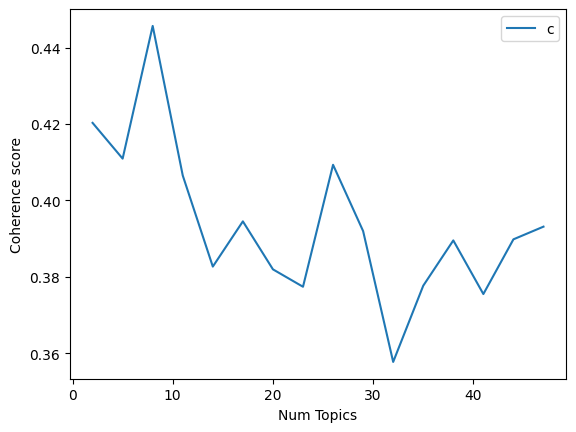

In [ ]:
# Show graph
limit=50; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Creating the object for LDA model using gensim library
import gensim
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=corpus_matrix,
                id2word=id2word,
                num_topics=6,
                update_every=1,
                chunksize=100,
                passes=20,
                alpha='auto',
                per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model.print_topics()

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_matrix))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=bag_of_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -6.567298856892959

Coherence Score:  0.4534137011408485


In [ ]:
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim.prepare(lda_model, corpus = corpus_matrix, dictionary = id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vis2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.361853  0.113192       1        1  55.868966
3      0.062928 -0.325424       2        1  19.587028
1     -0.148254  0.026660       3        1   6.623117
5     -0.037410  0.072217       4        1   6.308848
4     -0.127510  0.073878       5        1   6.020816
2     -0.111608  0.039477       6        1   5.591226, topic_info=         Term        Freq       Total Category  logprob  loglift
3     product  802.000000  802.000000  Default  30.0000  30.0000
18       skin  258.000000  258.000000  Default  29.0000  29.0000
59       hair  459.000000  459.000000  Default  28.0000  28.0000
119      good  463.000000  463.000000  Default  27.0000  27.0000
72        oil  174.000000  174.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
874      help   11.612253   30.326607   Topic6  -4.3429   1.9240
1282      ill    6.196184   14.455585   Topic6  -4.9711   2.0368
245      need    7.297782   63.501383   Topic6  -4.8074   0.7205
871      free    5.809270   17.682448   Topic6  -5.0355   1.7709
1503     leak    5.180911   13.644480   Topic6  -5.1500   1.9156

[244 rows x 6 columns], token_table=      Topic      Freq                              Term
term                                                   
778       3  0.910109                        absolutely
1124      4  0.916111                            absorb
77        2  0.952958                               add
1538      2  0.973311                     aloe_very_gel
555       4  0.861254                           already
...     ...       ...                               ...
105       2  0.232150                              well
439       5  0.866588                              wish
2101      3  0.987443  without_complete_ingredient_list
9         1  0.996610                              work
319       4  0.989038                             worth

[237 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 6, 5, 3])